# Exercise 1
Which linear regression training algorithm can you use if you have a training set
with millions of features?

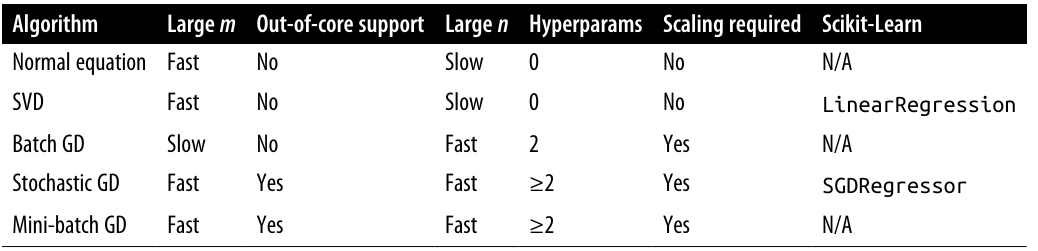 </br>
*n is the number of features.* </br>
It is advised to use gradient descent.

# Exercise 2
Suppose the features in your training set have very different scales. Which algo‐
rithms might suffer from this, and how? What can you do about it?

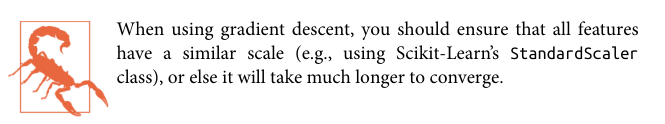 </br>
Gradient descent may suffer from it, so you should apply scaling.

# Exercise 3
Can gradient descent get stuck in a local minimum when training a logistic
regression model?

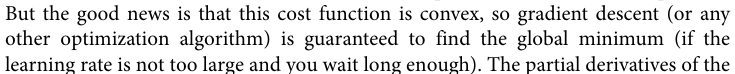 </br>
No it can't because the cost function (log loss) is convex.


# Exercise 4
Do all gradient descent algorithms lead to the same model, provided you let them
run long enough?

Pretty much. They can converge to the solution if you use a good learning schedule.

# Exercise 5
Suppose you use batch gradient descent and you plot the validation error at every
epoch. If you notice that the validation error consistently goes up, what is likely
going on? How can you fix this?

You should implement early stopping. The model is overfitting the training data. You can also try to use a better model or add features.

# Exercise 6
Is it a good idea to stop mini-batch gradient descent immediately when the
validation error goes up?

No, because when you are using the mini-batch sgd, the whole process is not so smooth. You should wait for some epochs and when you are confident that the error went up only then should you stop the training.

# Exercise 7
Which gradient descent algorithm (among those we discussed) will reach the
vicinity of the optimal solution the fastest? Which will actually converge? How
can you make the others converge as well?

The model that will reach the vicinity of the optimal solution the fastest will be the stochastic gradient descent. But it will not converge, only the batch gradient descent will converge. To make them converge you need to use a learning schedule.

# Exercise 8
Suppose you are using polynomial regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?

The model is overfitting. You can use a lasso regularization to try to bring the unnecessary parameters to zero, use a simpler model or try to come up with some new features.

# Exercise 9
Suppose you are using ridge regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that
the model suffers from high bias or high variance? Should you increase the
regularization hyperparameter α or reduce it?

The model suffers from high bias. It found the best compromise given the circumstances. It can't get any closer to the data. </br> 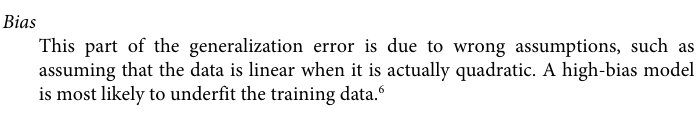 </br> You should reduce the α hyperparameter to give a model more flexibility.


# Exercise 10
Why would you want to use:
- a) Ridge regression instead of plain linear regression (i.e., without any
regularization)?


The Ridge regularization would keep weights smaller, thus constraining the model and preventing overfitting. It smoothens out the predictions.

- b. Lasso instead of ridge regression?

The Lasso regularization can be used when you suspect that only few features are usefull as it tends to bring the useless features weights to zero.

- c. Elastic net instead of lasso regression?

In general elastic net is preferred over lasso because lasso may behave eratically when the number of features gets greater than number of training instances or when several factors are strongly correlated.

# Exercise 11
Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.
Should you implement two logistic regression classifiers or one softmax regres‐
sion classifier?

You shuold implement two logistic regression classifiers because softmax reg class can predict only one class. </br>
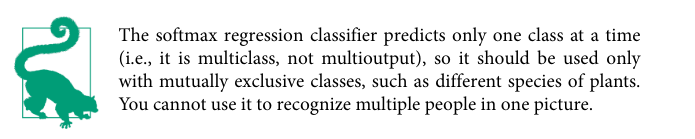

# Exercise 12
Implement batch gradient descent with early stopping for softmax regression
without using Scikit-Learn, only NumPy. Use it on a classification task such as
the iris dataset.

In [1]:
import numpy as np

np.random.seed(42)
epochs = 1000
lr = 0.1
m = 1000
num_classes = 3
num_features = 3

In [2]:
np.random.seed(42)
X = np.random.randn(m, num_features)
X[:,0] = 1
y = np.random.randint(0, num_classes, m)

X, y

(array([[ 1.        , -0.1382643 ,  0.64768854],
        [ 1.        , -0.23415337, -0.23413696],
        [ 1.        ,  0.76743473, -0.46947439],
        ...,
        [ 1.        ,  0.07203686, -0.21220897],
        [ 1.        ,  0.07748052,  0.25775254],
        [ 1.        ,  0.33417642, -0.15525905]]),
 array([1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2,
        1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0,
        1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1,
        2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0,
        2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0,
        2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0,
        1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2,
        1, 2, 0, 2, 0, 2,

In [3]:
np.random.seed(42)
theta = np.random.randn(num_classes, num_features) # 2 features 3 classes
theta

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439]])

In [4]:
def softmax_score_k(theta_k, x):
    return theta_k.T @ x

def softmax_score_k_matrix(theta_k, X):
    scores = []
    for x in X:
        scores.append(softmax_score_k(theta[:,k], x))
    return scores
    
def softmax_scores(theta, x):
    scores = []
    for k in range(num_classes):
        score = softmax_score_k(theta[:,k], x)
        scores.append(score)
    return scores

def softmax_scores_matrix(theta, X):
    scores = []
    for x in X:
        scores.append(softmax_scores(theta, x))
    return scores
        
scores = softmax_scores_matrix(theta, X)
scores

[[1.3089715340779882, 0.3911694293645603, 0.3759881421296892],
 [-0.22966051066915255, -0.2631213304178383, 0.8124338008061904],
 [0.9241401915345797, -0.6782526810964458, 0.6884099050087122],
 [-0.9445712245311191, -0.38717067178228537, 0.9748399365612455],
 [-5.141281130080058, -1.0140251246987333, 1.9054628925831576],
 [-0.549594467883814, 0.3400578402572159, 0.7372986610173609],
 [0.6603047684755705, 1.3172211426413392, 0.2902764732336369],
 [-1.650418969638629, -1.2474774965856925, 1.30076046958132],
 [-1.1520112391425432, -1.0475496442306242, 1.1620794634645113],
 [-0.8787230125258585, -0.22147863880549282, 0.9252629972494861],
 [3.2964741401116697, -0.5823397280114386, 0.22033836185208458],
 [-0.17849732538415397, -1.2677837840552162, 1.0282551983195518],
 [-4.585410384167007, -0.6986970290212764, 1.7300690672440877],
 [1.8920477881304438, -0.17966477253708585, 0.39433320167150887],
 [-2.2967766404437846, -1.202428977931531, 1.412316244631192],
 [1.4645685190229938, 0.7808681309

In [5]:
sum_of_scores = np.exp(scores).sum(axis=1)
sum_of_scores

array([   6.63750289,    3.81683763,    5.01775171,    3.71856436,
          7.0911248 ,    4.07249401,    7.0052125 ,    4.151286  ,
          3.86337038,    3.73917755,   28.8223002 ,    3.91416378,
          6.14847583,    8.95188263,    4.50649968,    7.80500012,
          4.35472021,    4.85202045,    4.45009435,   15.52533748,
          3.9603237 ,   51.10580018,   15.59673185,   35.78876977,
          4.89763657,    4.00320859,    4.60237409,    9.0220257 ,
          6.62414021,    4.81147303,    4.89400794,    4.56458021,
          5.08141833,    4.21954653,    3.79128732,   40.05999143,
          5.06125648,   94.37511002,    5.06272932,   32.92853774,
          8.15567285,  132.37605888,    3.96760674,    4.15300836,
          3.81015869,    3.78735424,    4.03564442,    4.20546059,
          3.89153271,    8.25533861,    3.85316865,    3.79640646,
          3.82000664,    4.95172029,    5.83971524,  118.64011954,
          4.11467109,    5.31443271,    8.20227277,   88.62853

In [6]:
def softmax_probabilities(scores):
    probabilities = []
    sum_of_scores = np.exp(scores).sum()
    for k, score in enumerate(scores):
        probability = np.exp(score) / sum_of_scores
        # print(f"probability for class {k}: {probability}")
        probabilities.append(probability)
    return probabilities

def softmax_probabilities_matrix(scores):
    probabilities = []
    for score in scores:
        probabilities.append(softmax_probabilities(score))
    return probabilities

In [7]:
probabilities = softmax_probabilities_matrix(scores)
probabilities

[[0.5577947097321997, 0.2227809242831508, 0.21942436598464948],
 [0.20823610067714093, 0.20138363396232603, 0.5903802653605331],
 [0.5021573432585903, 0.10114151054578796, 0.3967011461956217],
 [0.10456892114032355, 0.18259068234967357, 0.7128403965100029],
 [0.0008250017056720707, 0.05115632702303716, 0.9480186712712908],
 [0.1417273612780401, 0.34500452372686863, 0.5132681149950913],
 [0.27627742753878853, 0.5328936681064043, 0.1908289043548072],
 [0.04624337192713332, 0.06919022649710378, 0.8845664015757629],
 [0.08179401565241208, 0.09080058039125126, 0.8274054039563367],
 [0.1110706610220321, 0.214307298282741, 0.6746220406952269],
 [0.9373718161881843, 0.019380475678465667, 0.043247708133350084],
 [0.21371775454673697, 0.07190672419513609, 0.714375521258127],
 [0.0016588766825239517, 0.0808708979910279, 0.9174702253264482],
 [0.7409544902849239, 0.09333793773160529, 0.16570757198347075],
 [0.022319436962212783, 0.066673366744657, 0.9110071962931301],
 [0.5542186196510771, 0.27973

In [8]:
def predict(probabilities):
    return np.argmax(probabilities)
def predict_matrix(probabilities):
    predictions = []
    for prob in probabilities:
        predictions.append(np.argmax(prob))
    return predictions

In [9]:
predictions = predict_matrix(probabilities)
predictions

[0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,


In [11]:
def calculate_gradients_for_class(theta, X, y, k):
    p_k = softmax_score_k_matrix(theta[:,k], X)
    y_k = []
    p_k = np.array(p_k)
    m = len(X)
    for y_i in y:
        if y_i == k:
            y_k.append(1)
        else:
            y_k.append(0)

    y_k = np.array(y_k)

    return (1 / m) * np.dot(X.T, p_k - y_k)

In [17]:
epochs = 100
lr = 0.01

print(theta)

for epoch in range(epochs):
    for k in range(num_classes):
        theta[:,k] = theta[:,k] - lr * calculate_gradients_for_class(theta, X, y, k)        

print(theta)



[[ 0.30513765  0.33768636  0.35428022]
 [ 0.00697078  0.02103933 -0.02383298]
 [ 0.00835383  0.00239935  0.00333961]]
[[ 0.30558155  0.34052111  0.35259673]
 [ 0.00203892  0.02266052 -0.02338198]
 [ 0.00160421 -0.00213146  0.00588441]]
